In [ ]:
# Step 1: Import Required Libraries

In this step, we import all the Python libraries required for building and training our CNN model:

- `tensorflow` is used to build and train the model.
- `mnist` provides the dataset of handwritten digits.
- `Sequential` is used to stack model layers linearly.
- `Conv2D`, `MaxPooling2D` are used to extract image features.
- `Dense`, `Flatten` help in classifying the image.
- `to_categorical` is used to convert numerical labels into one-hot vectors.


In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical



# Step 2: Load the MNIST Dataset

We load the MNIST dataset which contains:
- 60,000 images for training
- 10,000 images for testing

Each image is a 28x28 grayscale image of a handwritten digit (0 to 9).


In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


# Step 3: Preprocess the Data

Before feeding the images into the CNN, we need to:
- **Normalize** the pixel values (from range 0–255 to 0–1)
- **Reshape** the images to include a channel dimension (28x28x1)
- **Convert** labels to one-hot encoded vectors using `to_categorical`


In [3]:
x_train = x_train.reshape(-1, 28, 28, 1) / 255.0
x_test = x_test.reshape(-1, 28, 28, 1) / 255.0

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)


# Step 4: Build the CNN Model

We use the Sequential model to build a Convolutional Neural Network:
- `Conv2D`: detects patterns in the image using 32 filters
- `MaxPooling2D`: reduces the size of the image and helps extract dominant features
- `Flatten`: converts the output into a single long vector
- `Dense`: fully connected layers for classification
- `softmax`: used in the final layer to output probabilities for 10 digit classes


In [4]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(100, activation='relu'),
    Dense(10, activation='softmax')
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# Step 5: Compile the Model

We compile the model using:
- **Optimizer**: `adam`, a popular choice for training
- **Loss function**: `categorical_crossentropy` for multi-class classification
- **Metrics**: `accuracy` to track how correct the model is during training


In [5]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


# Step 6: Train the Model

We now train the model using:
- **Training data** (`x_train`, `y_train`)
- **Validation data** (`x_test`, `y_test`)
- **Epochs**: Number of times the model will go through the training dataset


In [6]:
model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 34s 17ms/step - accuracy: 0.9048 - loss: 0.3175 - val_accuracy: 0.9780 - val_loss: 0.0644
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 17ms/step - accuracy: 0.9833 - loss: 0.0537 - val_accuracy: 0.9822 - val_loss: 0.0504
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 32s 17ms/step - accuracy: 0.9893 - loss: 0.0338 - val_accuracy: 0.9834 - val_loss: 0.0490
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 17ms/step - accuracy: 0.9929 - loss: 0.0221 - val_accuracy: 0.9867 - val_loss: 0.0386
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 33s 17ms/step - accuracy: 0.9956 - loss: 0.0147 - val_accuracy: 0.9856 - val_loss: 0.0412


# Step 7: Evaluate the Model

After training, we evaluate the model on the test dataset to check its final performance.

The output will show the **accuracy percentage** on unseen data.


In [7]:
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9819 - loss: 0.0499
Test Accuracy: 98.56%


# Step 8: Predict a Random Image

We randomly select one image from the test set and:
- Display it using `matplotlib`
- Use our trained model to predict the digit
- Compare predicted vs actual digit


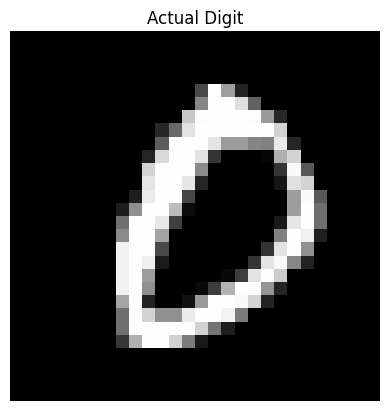

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
Predicted Digit: 0


In [8]:
import matplotlib.pyplot as plt
import numpy as np

index = np.random.randint(0, len(x_test))
image = x_test[index]

plt.imshow(image.reshape(28, 28), cmap='gray')
plt.title("Actual Digit")
plt.axis('off')
plt.show()

prediction = model.predict(image.reshape(1, 28, 28, 1))
print("Predicted Digit:", np.argmax(prediction))


## ✅ Step 9: Predict and Visualize the Result

Now that our model is trained, let's use it to **predict a digit from the test dataset** and see how accurate it is.

We'll take a sample from the test set (which the model hasn't seen before) and ask the model to predict its class.

We will also display the image along with the predicted and actual labels for comparison.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


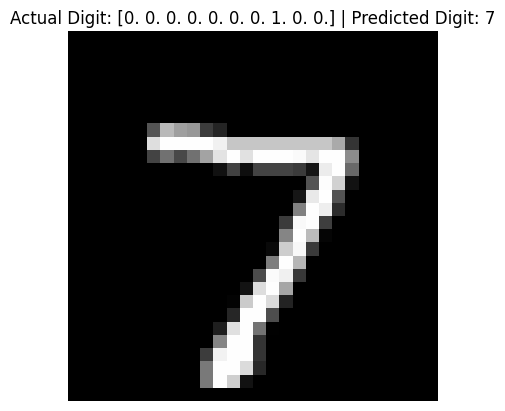

In [9]:
# Predict the first image from the test dataset
index = 0
sample_image = x_test[index]
sample_label = y_test[index]

# Reshape the image to match the input shape expected by the model
prediction = model.predict(sample_image.reshape(1, 28, 28, 1))

# Get the index of the highest predicted probability
predicted_label = np.argmax(prediction)

# Display the image
plt.imshow(sample_image.reshape(28, 28), cmap='gray')
plt.title(f"Actual Digit: {sample_label} | Predicted Digit: {predicted_label}")
plt.axis('off')
plt.show()


## ✅ Step 10: Displaying More Predictions (Test Column)

Let's extend the above idea by displaying the **first 10 images from the test dataset**, along with both the **actual and predicted digits**.

This will help us visualize how well our model is performing.

We’ll arrange the results like a **test column** to easily see which predictions are correct and which are not.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


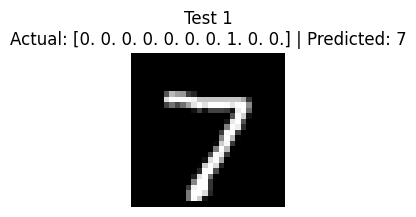

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


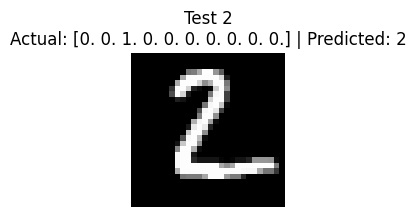

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


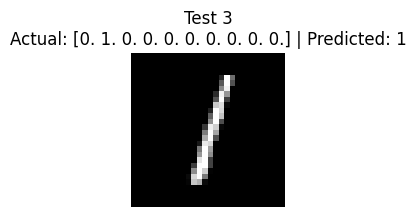

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


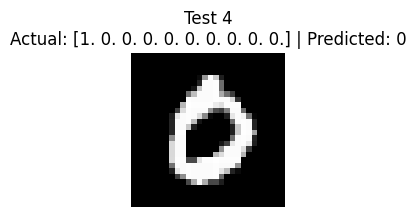

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


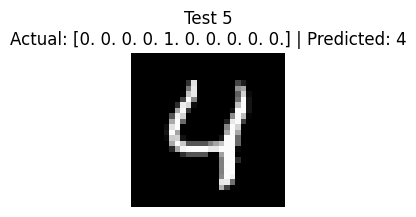

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


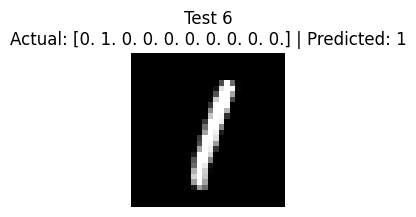

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


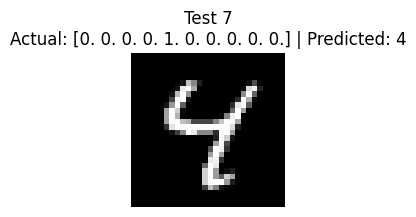

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


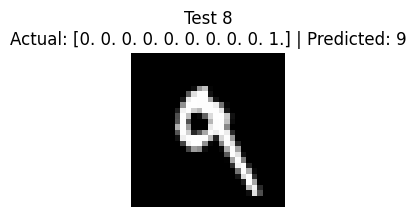

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


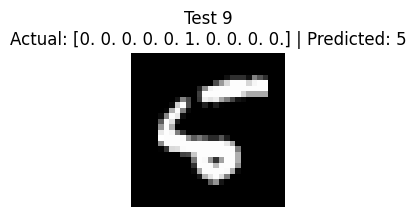

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


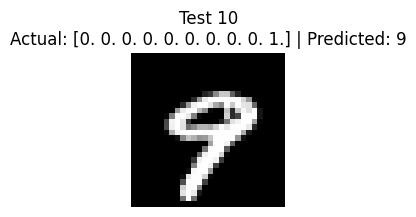

In [10]:
# Display 10 test images with predictions
for i in range(10):
    img = x_test[i]
    true_label = y_test[i]
    pred = model.predict(img.reshape(1, 28, 28, 1))
    pred_label = np.argmax(pred)

    plt.figure(figsize=(2, 2))
    plt.imshow(img.reshape(28, 28), cmap='gray')
    plt.title(f"Test {i+1}\nActual: {true_label} | Predicted: {pred_label}")
    plt.axis('off')
    plt.show()


## ✅ Step 11: Creating a Table of Predictions

Sometimes it's easier to read a table than to look at images. Let's create a **pandas DataFrame** that lists the actual and predicted labels side by side for the first 10 test samples.


In [15]:
import pandas as pd
import numpy as np

results = []

for i in range(10):
    img = x_test[i]

    # FIX: Use argmax if needed
    true = np.argmax(y_test[i]) if y_test[i].ndim > 0 and len(y_test[i]) > 1 else int(y_test[i])

    pred = model.predict(img.reshape(1, 28, 28, 1), verbose=0)
    predicted = int(np.argmax(pred))

    results.append({
        'Test No.': i + 1,
        'Actual': true,
        'Predicted': predicted,
        'Correct': true == predicted
    })

results_df = pd.DataFrame(results)
results_df


,Test No.,Actual,Predicted,Correct
0,1,7,7,True
1,2,2,2,True
2,3,1,1,True
3,4,0,0,True
4,5,4,4,True
5,6,1,1,True
6,7,4,4,True
7,8,9,9,True
8,9,5,5,True
9,10,9,9,True


## ✅ Step 12: Saving the Model

If you're satisfied with the model's accuracy and predictions, it's a good idea to **save the trained model** so that you can use it later without retraining.

We'll save it in `.h5` format, which is compatible with TensorFlow and Keras.


In [16]:
# Save the trained model
model.save("digit_recognizer_model.h5")
print("✅ Model saved as digit_recognizer_model.h5")


✅ Model saved as digit_recognizer_model.h5


### Step 13: Accuracy Score and Confusion Matrix

In this step, we calculate the overall accuracy of the model using scikit-learn and visualize the confusion matrix. This helps us understand how well our model is performing on each digit class.


✅ Model Accuracy on Test Set: 98.56%


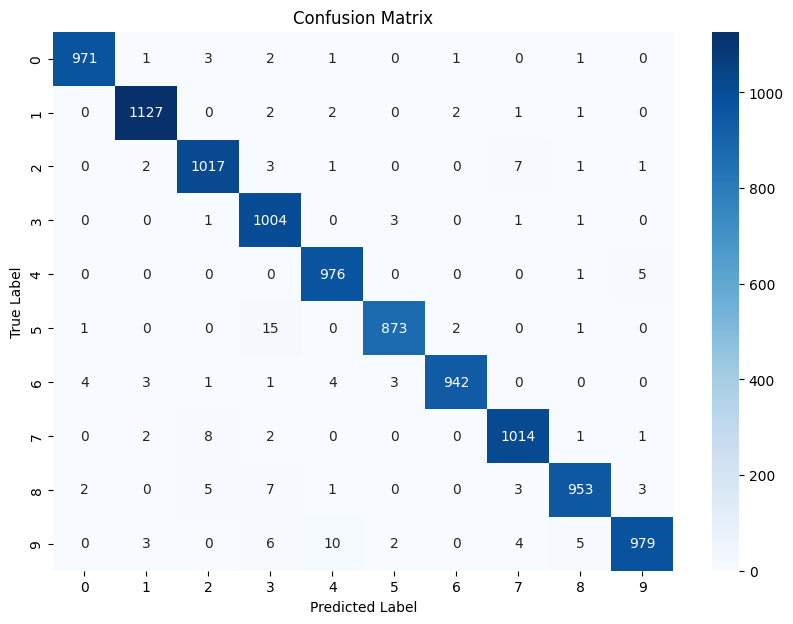

In [19]:
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Check if y_test is one-hot encoded
if y_test.ndim == 2 and y_test.shape[1] == 10:
    y_true = np.argmax(y_test, axis=1)
else:
    y_true = y_test

# Predict class probabilities
y_pred_probs = model.predict(x_test, verbose=0)
y_pred = np.argmax(y_pred_probs, axis=1)

# Accuracy score
accuracy = accuracy_score(y_true, y_pred)
print(f"✅ Model Accuracy on Test Set: {accuracy * 100:.2f}%")

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()
